In [168]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime


path=r"C:\Users\praya\Documents\Project STPI\Netflow Data_formulae.csv"
data=pd.read_csv(path,parse_dates=[0],infer_datetime_format= True, dayfirst=True,)

In [169]:
print(data.shape)

(10001, 9)


In [170]:
data.drop(['IF(AND(E3>1023,OR(D3 = "8.8.8.8", D3 = "203.190.128.141"),F3=53), "DNSREQ", "DNSRES")\n\n\n'],inplace=True,axis=1)

In [171]:
data

,###Traffic Detail###,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,ID,Time,source,destination,source port,destination port,FLAGS,NaN
1,1,05-08-2019 13:43,192.168.0.123,8.8.8.8,52684,53,DNSREQ,NaN
2,2,07-08-2019 17:41,192.168.0.19,203.190.128.141,11635,53,DNSREQ,NaN
3,3,30-07-2019 14:36,192.168.0.112,40.90.185.223,51931,443,DNSRES,NaN
4,4,02-08-2019 10:53,192.168.0.171,8.8.8.8,50835,53,DNSREQ,NaN
...,...,...,...,...,...,...,...,...
9996,9996,25-07-2019 17:02,203.190.41.130,203.190.128.131,5818,23,DNSRES,NaN
9997,9997,01-08-2019 15:50,203.100.75.3,203.190.128.136,27531,8080,DNSRES,NaN
9998,9998,20-07-2019 02:46,71.6.232.5,203.190.128.155,59414,20005,DNSRES,NaN
9999,9999,26-07-2019 13:29,192.168.0.224,13.234.86.210,57213,80,DNSRES,NaN


In [172]:
data.drop(['Unnamed: 7'],inplace=True,axis=1)

In [173]:
nan_value=float("NaN")
data.replace(" ",nan_value , inplace=True)
data.dropna(subset=["Unnamed: 4"],inplace=True)

In [174]:
data.shape

(9432, 7)

In [175]:
df=data.rename(columns={"Unnamed: 1":"Time Stamps","Unnamed: 2":"Source ip","Unnamed: 3":"D Address","Unnamed: 4":"SP Address","Unnamed: 5":"DP Address","###Traffic Detail###":"Traffic Detail(ID)","Unnamed: 6":"FLAGS"})

In [176]:
df.drop(index=0,axis=0,inplace=True)

In [177]:
df['Date']=df['Time Stamps']
df[['Date','Time']]=df.Date.str.split(expand=True)

In [180]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.strftime('%m-%d-%y')

In [181]:
df=df.sort_values(by='Date')

In [182]:
df.reset_index(inplace=True)
df.drop(['index'],inplace=True,axis=1)

In [183]:
df


,Traffic Detail(ID),Time Stamps,Source ip,D Address,SP Address,DP Address,FLAGS,Date,Time
0,3124,20-07-2019 11:30,139.199.164.202,203.190.128.152,20988,8080,DNSRES,07-20-19,11:30
1,9319,20-07-2019 00:01,95.213.177.122,203.190.128.147,41058,53281,DNSRES,07-20-19,00:01
2,2872,20-07-2019 03:54,178.212.89.128,203.190.128.157,40921,80,DNSRES,07-20-19,03:54
3,4804,20-07-2019 07:34,77.247.109.93,203.190.128.129,5124,33661,DNSRES,07-20-19,07:34
4,9904,20-07-2019 08:46,188.165.198.127,203.190.128.143,137,137,DNSRES,07-20-19,08:46
...,...,...,...,...,...,...,...,...,...
9426,4639,18-08-2019 06:49,203.190.113.200,203.190.128.147,42751,8291,DNSRES,08-18-19,06:49
9427,8013,18-08-2019 03:01,103.114.105.253,203.190.128.158,57266,3389,DNSRES,08-18-19,03:01
9428,4642,18-08-2019 00:32,192.168.0.41,185.86.139.19,63320,443,DNSRES,08-18-19,00:32
9429,8450,18-08-2019 10:23,185.254.122.31,203.190.128.149,46048,17542,DNSRES,08-18-19,10:23


In [184]:
#function to differentiate the traffic type
def traffic(dataframe,column,new_column_name):
    n=dataframe[column].count()
    j=[]
    gen=0
    mal=0
    for i in range(0,n):
        if dataframe[column][i] == "53":
            j.append('Genuine traffic')
            gen=gen+1
        elif dataframe[column][i] =="443":
            j.append('Genuine traffic')
            gen=gen+1
        elif dataframe[column][i]=="80":
            j.append('Genuine traffic')
            gen=gen+1
        else:
            j.append('Malicious traffic')
            mal=mal+1
        
    dataframe.insert(9,new_column_name,j)
    print("Genuine traffic- ",gen)
    print("Genuine percentage- ",((gen/(gen+mal))*100))
    print("Malicious traffic- ",mal)
    print("Malicious percentage- ",((mal/(gen+mal))*100))

In [185]:
traffic(df,"DP Address","Traffic Type")

Genuine traffic-  6070
Genuine percentage-  64.36220973385643
Malicious traffic-  3361
Malicious percentage-  35.63779026614357


In [186]:
n=df["Traffic Type"].count()
j=[]
for i in range(0,n):
    if df["Traffic Type"][i] == "Genuine traffic":
        j.append('Safe')
    else:
        j.append('To Be Discarded')
        
df.insert(10,"Status",j)

In [187]:
df

,Traffic Detail(ID),Time Stamps,Source ip,D Address,SP Address,DP Address,FLAGS,Date,Time,Traffic Type,Status
0,3124,20-07-2019 11:30,139.199.164.202,203.190.128.152,20988,8080,DNSRES,07-20-19,11:30,Malicious traffic,To Be Discarded
1,9319,20-07-2019 00:01,95.213.177.122,203.190.128.147,41058,53281,DNSRES,07-20-19,00:01,Malicious traffic,To Be Discarded
2,2872,20-07-2019 03:54,178.212.89.128,203.190.128.157,40921,80,DNSRES,07-20-19,03:54,Genuine traffic,Safe
3,4804,20-07-2019 07:34,77.247.109.93,203.190.128.129,5124,33661,DNSRES,07-20-19,07:34,Malicious traffic,To Be Discarded
4,9904,20-07-2019 08:46,188.165.198.127,203.190.128.143,137,137,DNSRES,07-20-19,08:46,Malicious traffic,To Be Discarded
...,...,...,...,...,...,...,...,...,...,...,...
9426,4639,18-08-2019 06:49,203.190.113.200,203.190.128.147,42751,8291,DNSRES,08-18-19,06:49,Malicious traffic,To Be Discarded
9427,8013,18-08-2019 03:01,103.114.105.253,203.190.128.158,57266,3389,DNSRES,08-18-19,03:01,Malicious traffic,To Be Discarded
9428,4642,18-08-2019 00:32,192.168.0.41,185.86.139.19,63320,443,DNSRES,08-18-19,00:32,Genuine traffic,Safe
9429,8450,18-08-2019 10:23,185.254.122.31,203.190.128.149,46048,17542,DNSRES,08-18-19,10:23,Malicious traffic,To Be Discarded


In [188]:
def counting(dataframe,column):
    n=dataframe[column].count()
    j=[]
    for i in range(0,n):
        if len(dataframe[column][i]) == 4:
            j.append(len(dataframe[column][i])//4)
        else:
            j.append(len(dataframe[column][i]))
        
    dataframe.insert(1,"VALUE COUNT",j)

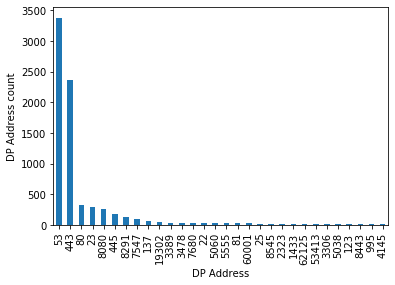

In [220]:
plt.xlabel("DP Address")
plt.ylabel("DP Address count")
df['DP Address'].value_counts(sort=True).nlargest(30).plot.bar()

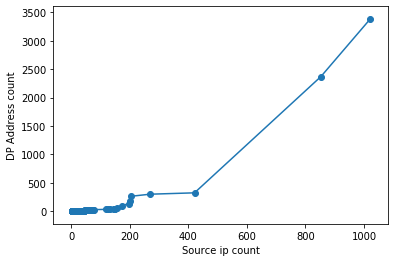

In [190]:
plt.xlabel("Source ip count")
plt.ylabel("DP Address count")
plt.plot(df['Source ip'].value_counts(sort=True).nlargest(1000),df['DP Address'].value_counts(sort=True).nlargest(1000))
plt.scatter(df['Source ip'].value_counts(sort=True).nlargest(1000),df['DP Address'].value_counts(sort=True).nlargest(1000))

9431

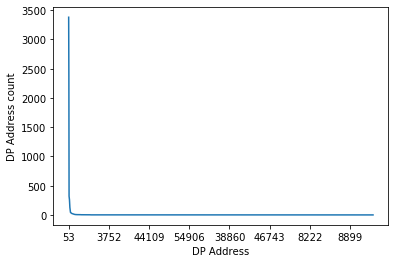

In [191]:
plt.xlabel("DP Address")
plt.ylabel("DP Address count")
df['DP Address'].value_counts(sort=True).plot.line()
df['DP Address'].value_counts(sort=True).sum()

In [192]:
#pivot table
count = df.pivot_table(index="DP Address", aggfunc=pd.Series.unique)
count.drop(['D Address','Date','SP Address','Source ip','Time','Time Stamps','FLAGS','Status','Traffic Type'],inplace=True,axis=1)


In [193]:
counting(count,'Traffic Detail(ID)')

In [194]:
count=count.sort_values(by='VALUE COUNT',ascending=False)

In [195]:
count.drop(['Traffic Detail(ID)'],inplace=True,axis=1)

In [196]:
count.reset_index(inplace=True)

In [197]:
#all Malacious data in a single column
others=count['VALUE COUNT'][3:1515].sum()
print(others)

3591


In [198]:
new_val={"DP Address":"Others","VALUE COUNT":count['VALUE COUNT'][3:1515].sum()}
count=count.append(new_val,ignore_index=True)
count.drop(count.index[3:1515],axis=0,inplace=True)

In [199]:
count.reset_index(inplace=True)
count.drop(['index'],inplace=True,axis=1)

In [200]:
count

,DP Address,VALUE COUNT
0,53,3380
1,443,2369
2,80,321
3,Others,3591


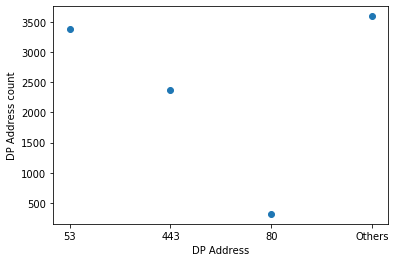

In [201]:
plt.xlabel("DP Address")
plt.ylabel("DP Address count")
plt.scatter(count['DP Address'],count['VALUE COUNT'])

(0        53
 1       443
 2        80
 3    Others
 Name: DP Address, dtype: object,
 <matplotlib.axes._subplots.AxesSubplot at 0x214e63b87c8>)

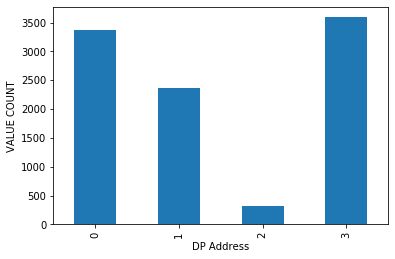

In [202]:
plt.xlabel("DP Address")
plt.ylabel("VALUE COUNT")
count['DP Address'],count['VALUE COUNT'].plot(kind="bar")

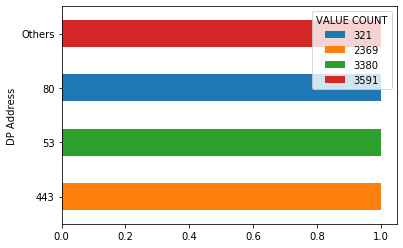

In [203]:
count.groupby(['DP Address','VALUE COUNT']).size().unstack().plot(kind='barh',stacked=True)

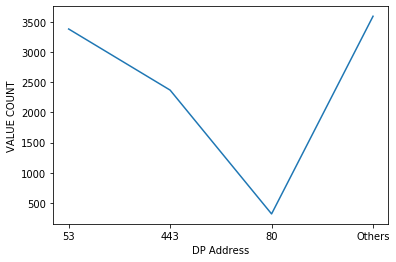

In [204]:
plt.xlabel("DP Address")
plt.ylabel("VALUE COUNT")
plt.plot(count['DP Address'],count['VALUE COUNT'])

ML PART


In [205]:
#Naive Bayes
from sklearn import preprocessing
testcase_size=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80]
nb_test=[]
le=preprocessing.LabelEncoder()
source_encoder=le.fit_transform(df['Source ip'])
print(source_encoder)

[ 269 1333  410 ...  652  532  683]


In [206]:
label=le.fit_transform(df['Traffic Type'])

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(source_encoder,label,test_size=0.80)
X=X_train.reshape(-1,1)


In [208]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y_train)
y_pred=model.predict(X_test.reshape(-1,1))
print(y_pred)

[1 0 1 ... 0 0 0]


In [209]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy: {0}%'.format(accuracy*100))
#nb_test.append((accuracy*100))
nb_results=[95.23305084745762,
 95.4954954954955,
 95.8303886925795,
 95.54730983302412,
 95.52586938083121,
 95.52924544972609,
 95.7437140260527,
 95.89131875414182]

Accuracy: 95.97084161696488%


In [210]:
#KNN prediction
from sklearn import preprocessing
knns=[]
knn_no=[5,7,11,15,17,20,23,25]
knn_test=[]
le=preprocessing.LabelEncoder()
source_encoder=le.fit_transform(df['Source ip'])
label=le.fit_transform(df['Traffic Type'])

In [211]:
from sklearn.model_selection import train_test_split
KX_train,KX_test,KY_train,KY_test=train_test_split(source_encoder,label,test_size=0.80)


In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(KX_train.reshape(-1,1))

KX_train = scaler.transform(KX_train.reshape(-1,1))
KX_test = scaler.transform(KX_test.reshape(-1,1))

In [213]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(KX_train, KY_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [214]:
KY_pred = classifier.predict(KX_test.reshape(-1,1))
print(KY_pred)

[1 0 1 ... 0 1 0]


In [215]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(KY_test, KY_pred))
print(classification_report(KY_test, KY_pred))

[[4781   75]
 [ 169 2520]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4856
           1       0.97      0.94      0.95      2689

    accuracy                           0.97      7545
   macro avg       0.97      0.96      0.96      7545
weighted avg       0.97      0.97      0.97      7545



In [216]:
from sklearn import metrics
accuracy=metrics.accuracy_score(KY_test,KY_pred)
print('Accuracy: {0}%'.format(accuracy*100))
#knns.append((accuracy*100))
#knn_test.append((accuracy*100))
knn_results=[97.45762711864407,
 97.08532061473238,
 96.60777385159011,
 97.03153988868274,
 96.94656488549617,
 96.81922601166283,
 96.75855801272341,
 96.73956262425448]

Accuracy: 96.7660702451955%


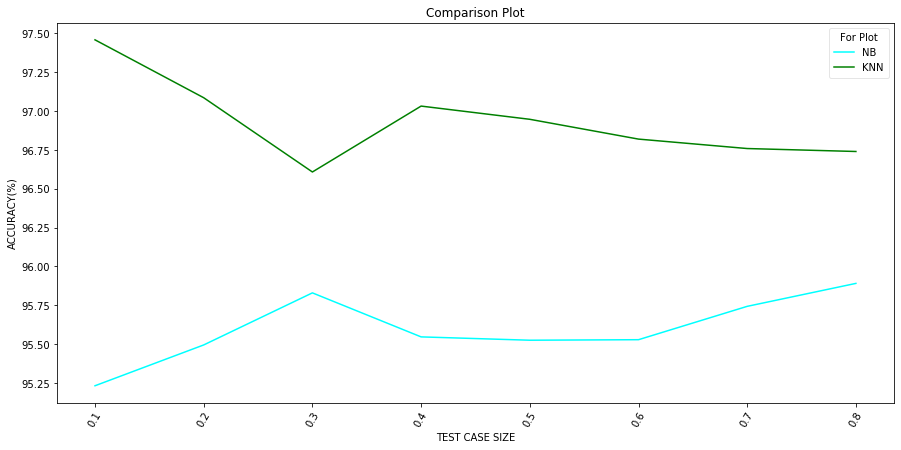

In [223]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.locator_params(axis="y", nbins=10)
plt.locator_params(axis="x", nbins=8)
plt.xlabel("TEST CASE SIZE")
plt.ylabel("ACCURACY(%)")
plt.title("Comparison Plot")
plt.plot(testcase_size,nb_results,color='Cyan')
plt.plot(testcase_size,knn_results,color='Green')
plt.legend(['NB', 'KNN'],frameon=True,framealpha=0.5,ncol=1,shadow=False,borderpad=0.5,title='For Plot')